# Imports

In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, auc, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import time

# Data, Preprocessing and EDA

In [ ]:
# Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [ ]:
# Print info on white wine
print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [ ]:
# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [ ]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [ ]:
red.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
pd.isnull(white).count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [ ]:
pd.isnull(red).count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

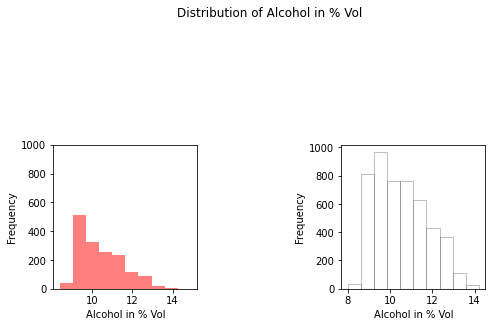

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

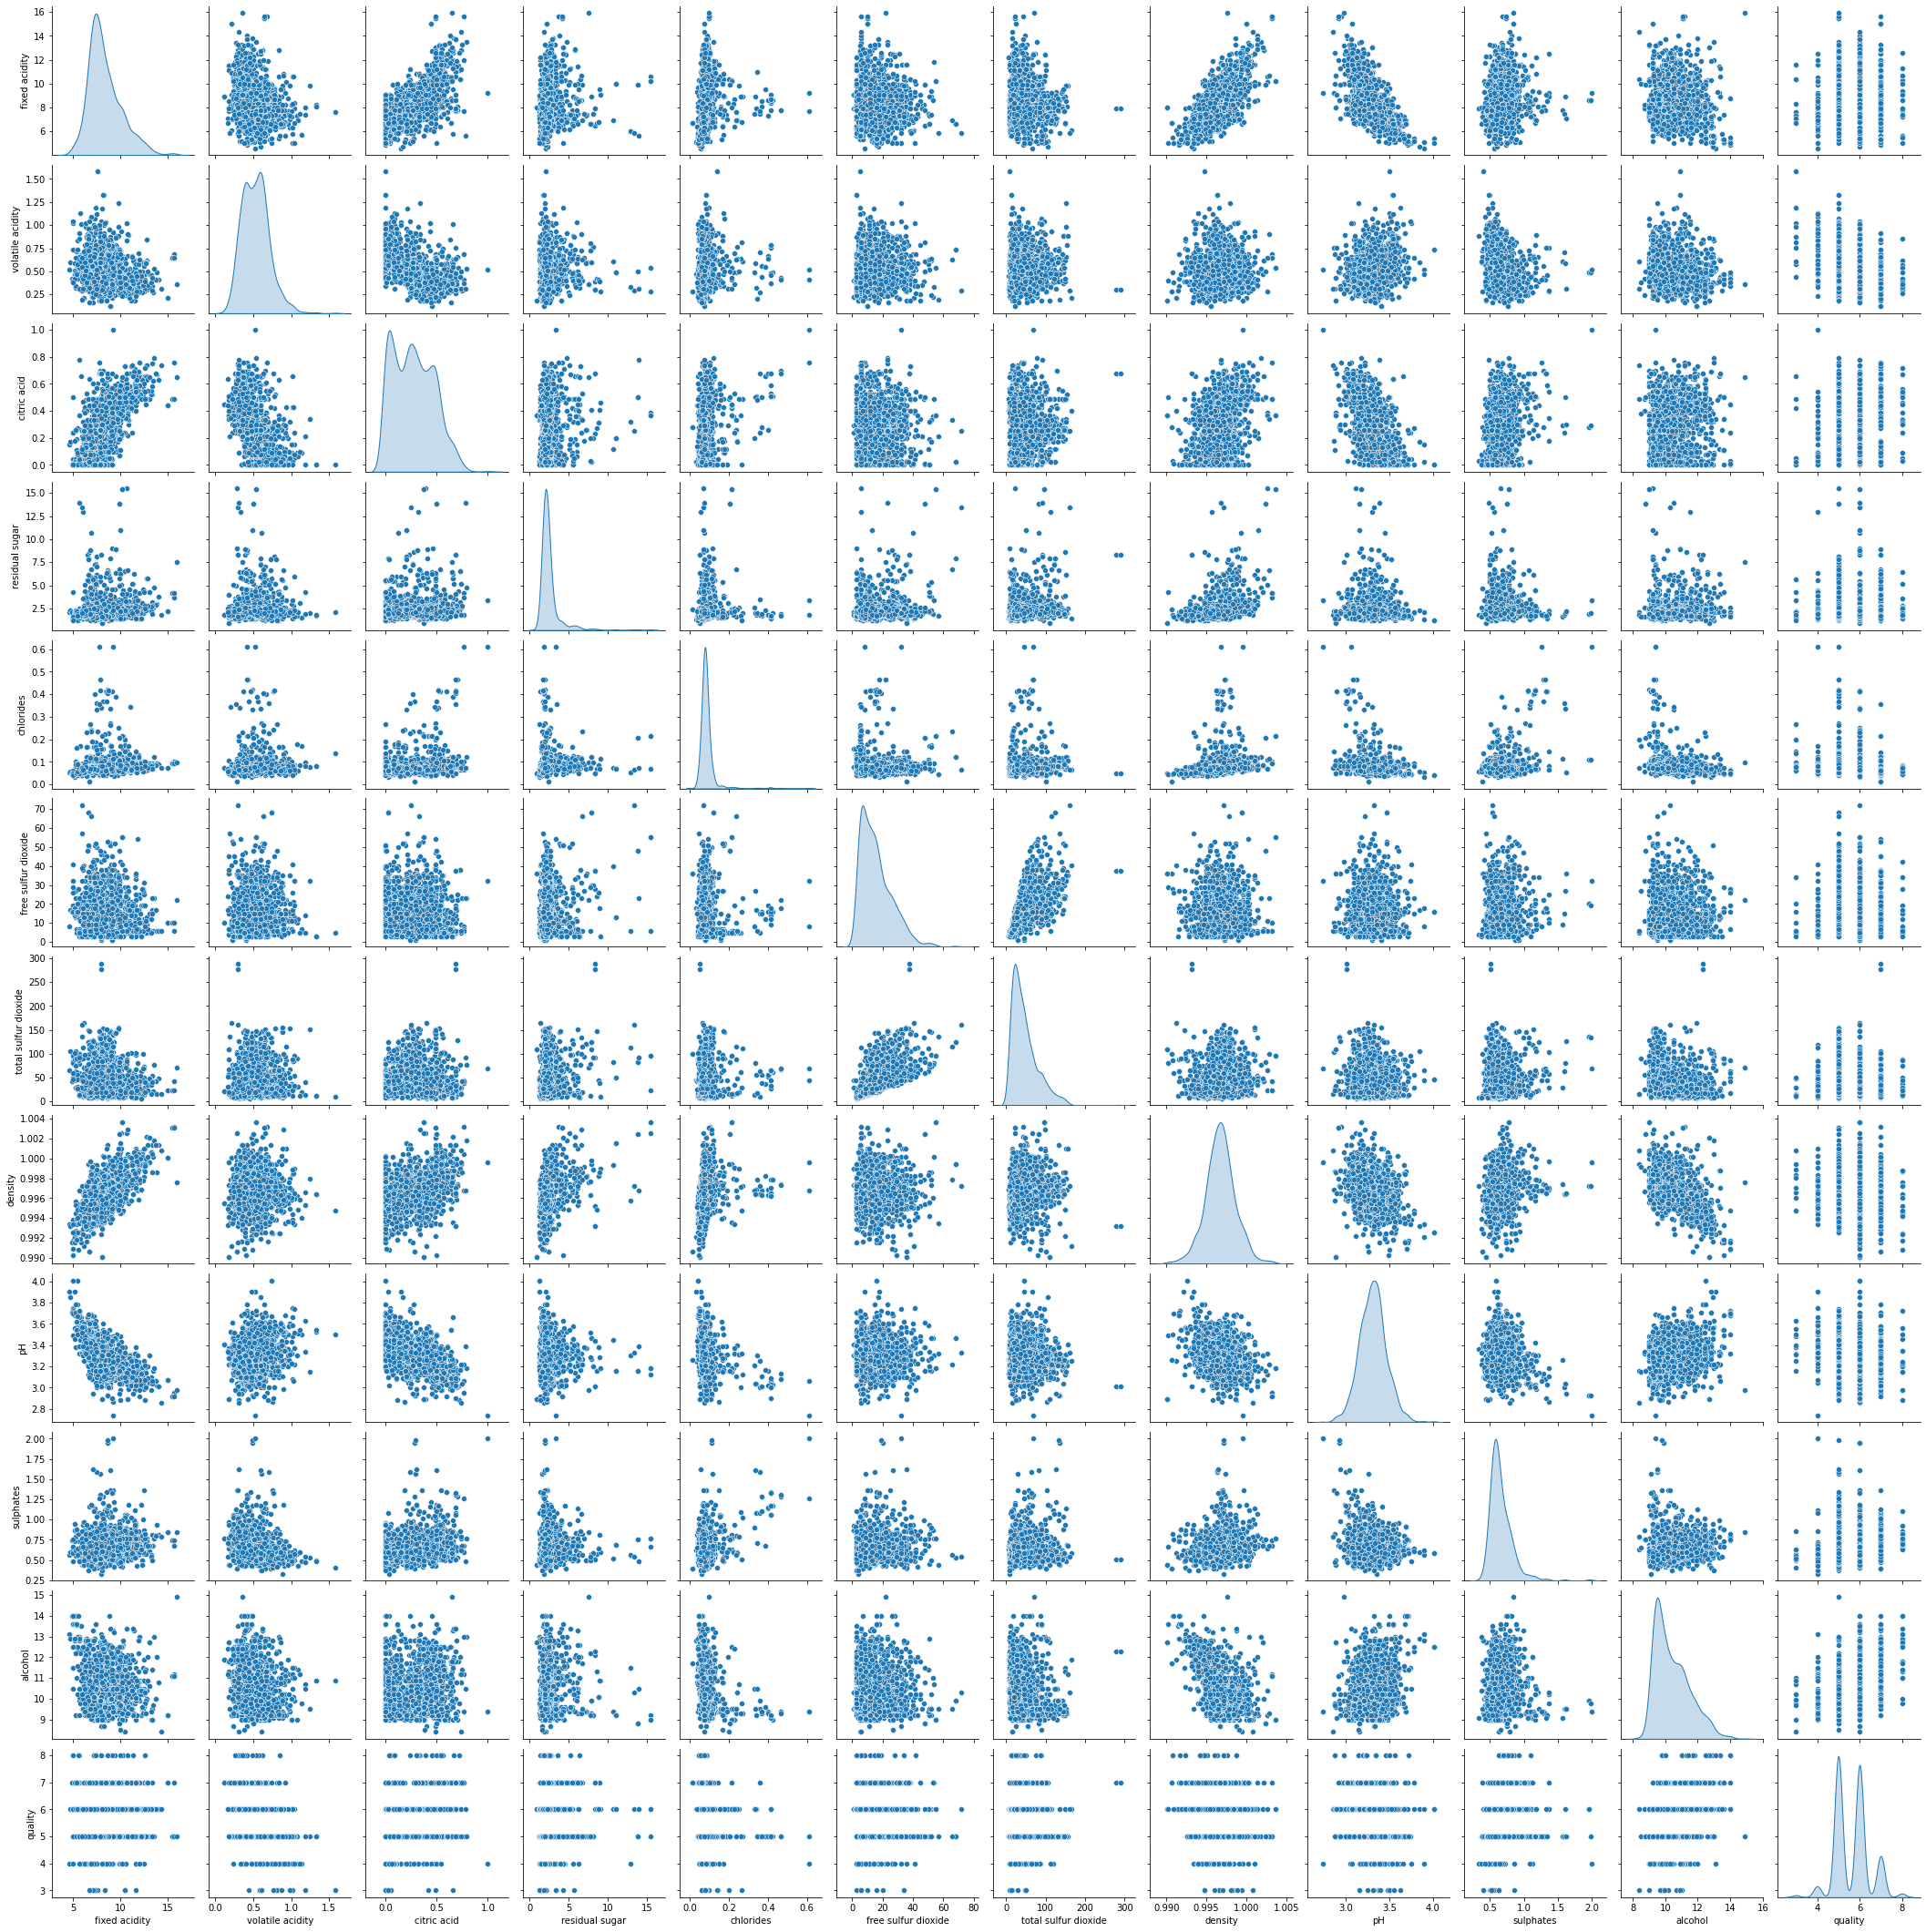

In [ ]:
fig = sns.pairplot(data=red, diag_kind = 'kde')
fig.savefig("red")

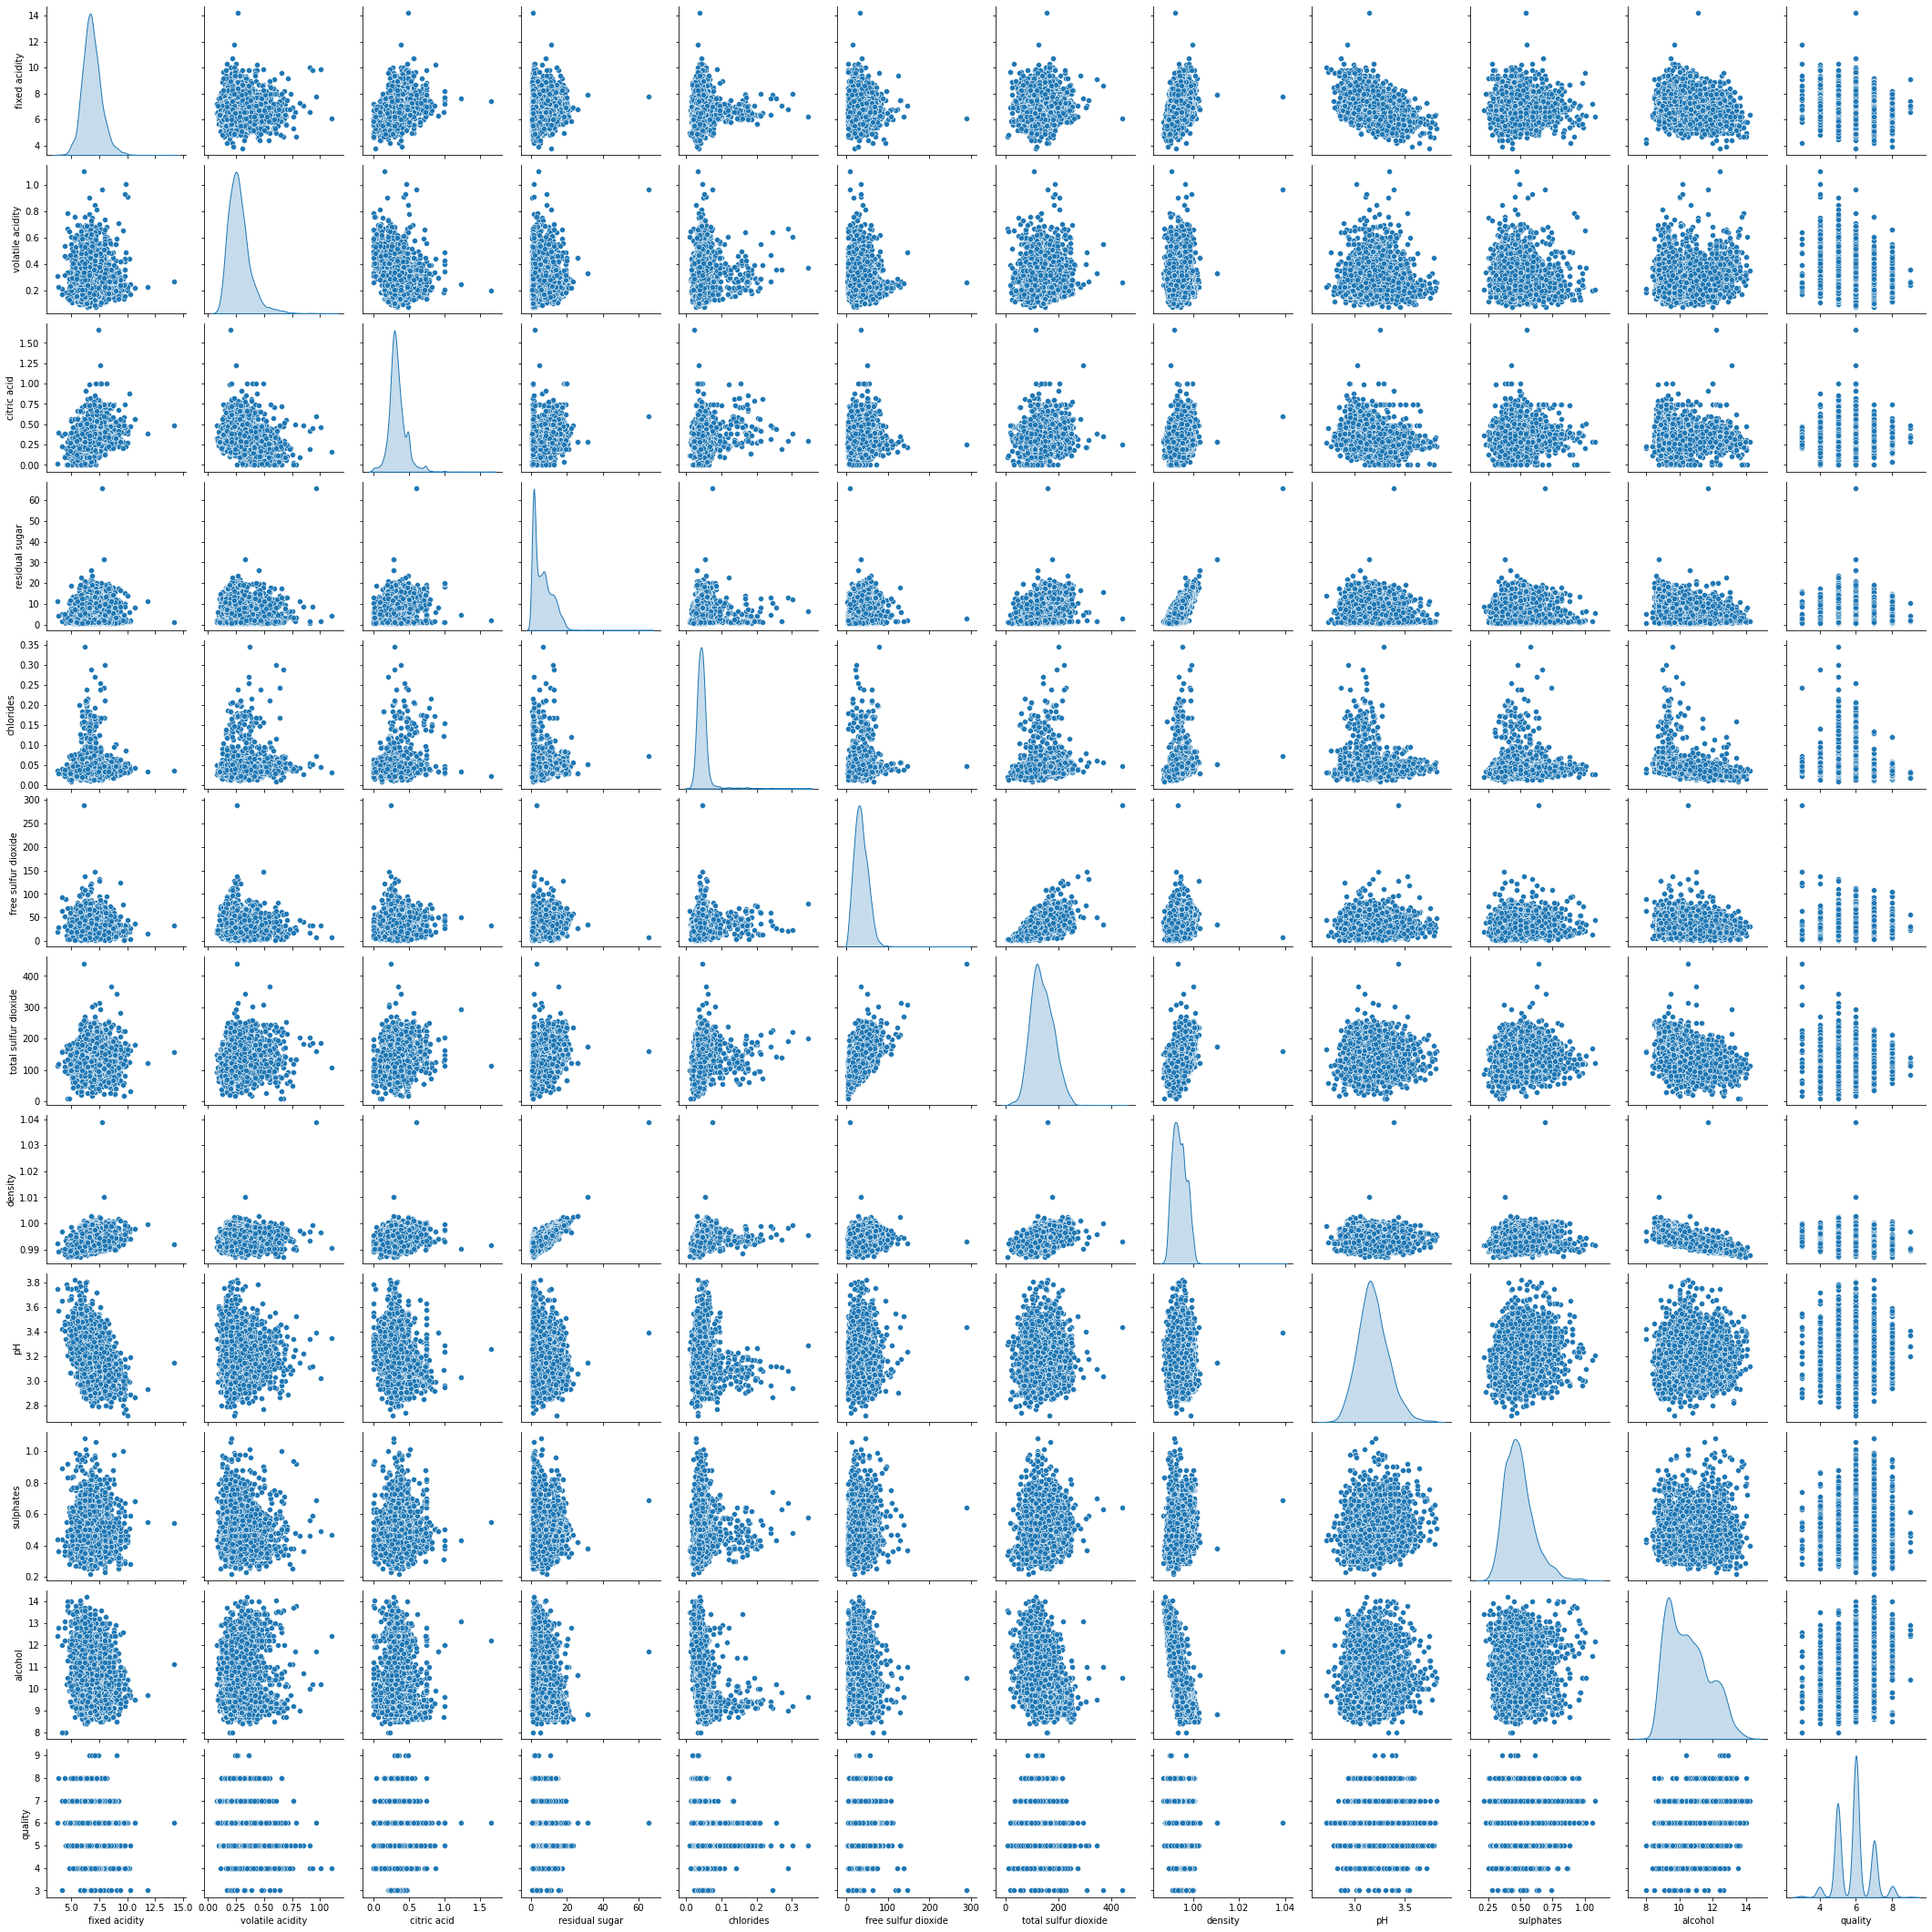

In [ ]:
fig = sns.pairplot(data=white, diag_kind = 'kde')
fig.savefig("white_stats")

In [ ]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)
wines.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  type  
6492     11.2        6     0  
6493      9.6        5     0  
6494      9.4        6     0  
6495     12.8        7     0  
6496     11.8        6     0

In [ ]:
# Specify the data
x=wines.iloc[:,0:11]

# Specify the target labels and flatten the array
y= np.ravel(wines.type)
#y= wines.type


Plotting Dataset

**Splitting Training and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x ,y,test_size =0.3, random_state=10)

# print the data
x_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5397            7.9              0.21         0.39            2.00      0.057   
2614            7.6              0.39         0.22            2.80      0.036   
3418            6.8              0.33         0.28            1.20      0.032   
5506            6.7              0.31         0.30            2.40      0.038   
1983            6.0              0.36         0.39            3.20      0.027   
...             ...               ...          ...             ...        ...   
1180            8.2              0.35         0.33            2.40      0.076   
3441            8.2              0.18         0.31           11.80      0.039   
1344           11.5              0.42         0.48            2.60      0.077   
4623            7.0              0.13         0.37           12.85      0.042   
1289            7.0              0.60         0.30            4.50      0.068   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5397                 21.0                 138.0  0.99176  3.05       0.52   
2614                 19.0                 113.0  0.99260  3.03       0.29   
3418                 38.0                 131.0  0.98890  3.19       0.41   
5506                 30.0                  83.0  0.98867  3.09       0.36   
1983                 20.0                 125.0  0.99100  3.38       0.39   
...                   ...                   ...      ...   ...        ...   
1180                 11.0                  47.0  0.99599  3.27       0.81   
3441                 96.0                 249.0  0.99760  3.07       0.52   
1344                  8.0                  20.0  0.99852  3.09       0.53   
4623                 36.0                 105.0  0.99581  3.05       0.55   
1289                 20.0                 110.0  0.99914  3.30       1.17   

      alcohol  
5397     10.9  
2614     10.2  
3418     13.0  
5506     12.8  
1983     11.3  
...       ...  
1180     11.0  
3441      9.5  
1344     11.0  
4623     10.7  
1289     10.2  

[4547 rows x 11 columns]

In [ ]:
y_test[0:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#Global Scaled data
# Define the scaler
scaler = StandardScaler().fit(x_train)

# Scale the train set
X_train = scaler.transform(x_train)

# Scale the test set
X_test = scaler.transform(x_test)

In [ ]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (4547, 11)
x_test:  (1950, 11)
y_train:  (4547,)
y_test:  (1950,)


# Decision Tree with Pruning

Time taken to train the multiple hidden NN model generalized:  33.27278184890747 seconds
train accuracy [0.9155453357215471, 0.9155453357215471, 0.9155453357215471, 0.9155453357215471, 0.9155453357215471, 0.9509546400735827, 0.9509546400735827, 0.9509546400735827, 0.9509546400735827, 0.9509546400735827, 0.97339013409498, 0.97339013409498, 0.97339013409498, 0.97339013409498, 0.97339013409498, 0.9804255216149491, 0.9806457859321297, 0.9813060947862711, 0.9806457859321297, 0.9810872827612916, 0.9830667570315148, 0.9839473302028369, 0.9832860531538946, 0.9830667570315148, 0.9828469768117346, 0.9848249987897566, 0.9839444256184345, 0.9828445563247327, 0.9839468461054365, 0.9828445563247327, 0.984825482887157, 0.9850447790095368, 0.9843844701553953, 0.9824064481773733, 0.9819659195430119, 0.9852640751319166, 0.9857031514740766, 0.9848245146923562, 0.9821856997627924, 0.9830653047393134, 0.9852655274241178, 0.9861451324006391, 0.9861446483032387, 0.9841666263252167, 0.9826247761049522, 0.9852

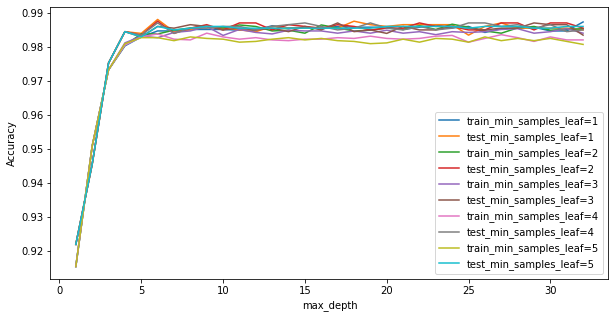

In [ ]:
start_time = time.time()

max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
min_samples_leafs = [1, 2, 3, 4, 5]

train_accuracies = []
test_accuracies = []

for i in max_depths:
    for j in min_samples_leafs:
        dtc = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_leaf=j)

        scores = cross_val_score(dtc, x_train, y_train, cv=10)
        train_accuracies.append(scores.mean())

        dtc.fit(x_train, y_train)
        test_accuracies.append(dtc.score(x_test, y_test))

print("Time taken to train the multiple hidden NN model generalized: ", time.time() - start_time, "seconds")

print('train accuracy', train_accuracies)
print('test accuracy', test_accuracies)

train_accuracies_plot = np.array(train_accuracies).reshape(-1, len(min_samples_leafs))
test_accuracies_plot = np.array(test_accuracies).reshape(-1, len(min_samples_leafs))

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(min_samples_leafs)):
    ax.plot(max_depths, train_accuracies_plot[:, i], label='train_min_samples_leaf='+str(min_samples_leafs[i]))
    ax.plot(max_depths, test_accuracies_plot[:, i], label='test_min_samples_leaf='+str(min_samples_leafs[i]))

ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()



Accuracy

In [ ]:
# Train the decision tree classifier

start_time = time.time()
clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)
clf = clf.fit(x_train, y_train)

# Evaluate the accuracy of the model on the test data
dt_accuracy = clf.score(x_test, y_test)
print("Accuracy:", dt_accuracy)

print("Time taken to train the DT model: ", time.time() - start_time, "seconds")

Accuracy: 0.9841025641025641
Time taken to train the DT model:  0.028597354888916016 seconds


Hyperparameter tuning

In scikit-learn, you can perform hyperparameter tuning by using techniques such as Grid Search and Randomized Search. Grid Search is a brute-force approach that trains a model for every combination of hyperparameters specified in a grid, while Randomized Search samples the hyperparameter space randomly to find the best set of hyperparameters.

In [ ]:
# Define the parameter grid to search over
#param_grid = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5]}
param_grid = {'max_depth': [8, 9, 10, 11], 'min_samples_leaf': [8, 9, 10, 11, 12]}

# Train the decision tree classifier with grid search
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'])
clf.fit(x_train, y_train)

# Evaluate the accuracy of the final model on the test data
tuning_accuracy = clf.score(x_test, y_test)
print("Accuracy:", tuning_accuracy)

Accuracy: 0.9784615384615385


Observation with scaled data

In [ ]:
# Get the original feature names
# feature_names = x.columns

# Define the scaler
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train_scaled = scaler.transform(x_train)

# Scale the test set
x_test_scaled = scaler.transform(x_test)

# Add the feature names back to the scaled data
# x_train_scaled = pd.DataFrame(x_test_scaled, columns=feature_names)
# x_test_scaled = pd.DataFrame(x_test_scaled, columns=feature_names)

In [ ]:
# Define the parameter grid to search over
# param_grid = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5]}
param_grid = {'max_depth': [8, 9, 10, 11], 'min_samples_leaf': [8, 9, 10, 11, 12]}

# Train the decision tree classifier with grid search
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'])
clf.fit(x_train, y_train)

# Evaluate the accuracy of the final model on the test data
dt_scaled_accuracy = clf.score(x_test_scaled, y_test)
print("Accuracy:", dt_scaled_accuracy)

Accuracy: 0.7143589743589743


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix

In [ ]:
# Calculate the confusion matrix
clf.fit(x_train, y_train)

# Predict on the test set
y_pred = clf.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Visualize confusion Matrix

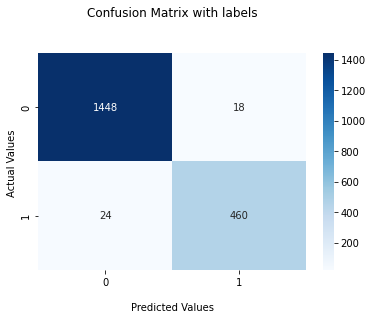

In [ ]:
# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1466
           1       0.96      0.95      0.96       484

    accuracy                           0.98      1950
   macro avg       0.97      0.97      0.97      1950
weighted avg       0.98      0.98      0.98      1950



**ROC Curve**

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

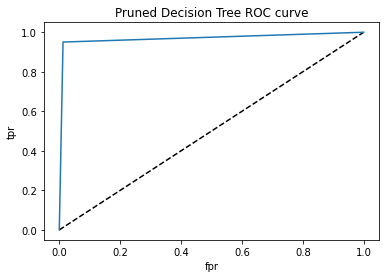

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='DT')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Pruned Decision Tree ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred)

0.9690674574092657

**Cross Validation Score**

In [ ]:
scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')

# Print the mean and standard deviation of the scores
print("Mean cross-validation score: ", scores.mean())
print("Standard deviation of the scores: ", scores.std())

Mean cross-validation score:  0.9815251635053615
Standard deviation of the scores:  0.004370620655078298


# Neural Network

In [ ]:
start_time = time.time()
# Train a neural network classifier with single layer
clf = MLPClassifier(max_iter=1000, random_state=0)
clf.fit(x_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(x_test)
print("Time taken to train the NNT model: ", time.time() - start_time, "seconds")

Time taken to train the NNT model:  3.7914271354675293 seconds


In [ ]:
# neural network has a depth of 3 (1 input layer, 2 hidden layers, and 1 output layer)

start_time = time.time()
# Train a neural network classifier with single layer
clf_m = MLPClassifier(hidden_layer_sizes=(100, 100))
clf_m.fit(x_train, y_train)

# Predict the class labels for the test set
y_pred_m = clf_m.predict(x_test)
print("Time taken to train the 2 hidden NNT model: ", time.time() - start_time, "seconds")

Time taken to train the 2 hidden NNT model:  9.917149305343628 seconds


**Neural Network Accuracy**

In [ ]:
# Calculate the accuracy on the test data
nn_accuracy = clf.score(x_test, y_test)
print("Accuracy:", nn_accuracy)

Accuracy: 0.9825641025641025


In [ ]:
# Calculate the accuracy on the test data with depth 3 multi level
nn_accuracy_m = clf_m.score(x_test, y_test)
print("Accuracy depth 3:", nn_accuracy_m)

Accuracy depth 3: 0.9830769230769231


Time taken to train the multiple hidden NN model:  51.484331369400024 seconds
Train accuracy [0.9848251594457884, 0.9804266549373213, 0.9828458324169782, 0.9837255333186716, 0.9859247855729052, 0.9810864306135914, 0.9850450846712118, 0.9828458324169782, 0.9843853089949417, 0.9848251594457884, 0.9850450846712118, 0.9861447107983285, 0.9881240378271388, 0.9841653837695183]
Test Accuracy [0.9825641025641025, 0.9794871794871794, 0.9830769230769231, 0.9841025641025641, 0.981025641025641, 0.9769230769230769, 0.9825641025641025, 0.978974358974359, 0.981025641025641, 0.9794871794871794, 0.9835897435897436, 0.9815384615384616, 0.9830769230769231, 0.9825641025641025]


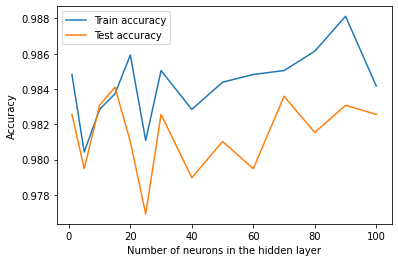

In [ ]:
#Random hidden layers

# List of different numbers of neurons in the hidden layer
hidden_layer_sizes = [1, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize lists to store accuracy scores
train_accuracy = []
test_accuracy = []

start_time = time.time()
# Train the classifier with different numbers of neurons in the hidden layer
for n in hidden_layer_sizes:
    clf_n = MLPClassifier(hidden_layer_sizes=(n,), max_iter=1000, random_state=0)
    clf_n.fit(x_train, y_train)

    # Evaluate the accuracy on the train and test sets
    train_accuracy.append(clf_n.score(x_train, y_train))
    test_accuracy.append(clf_n.score(x_test, y_test))

print("Time taken to train the multiple hidden NN model: ", time.time() - start_time, "seconds")

print('Train accuracy', train_accuracy)
print('Test Accuracy', test_accuracy)

# Plot the accuracy vs number of neurons in the hidden layer
plt.plot(hidden_layer_sizes, train_accuracy, label='Train accuracy')
plt.plot(hidden_layer_sizes, test_accuracy, label='Test accuracy')
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




**Confusion Matrix**

In [ ]:
# Predict on the test set
y_pred_nn = clf.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)

Visualize Confusion Matrix

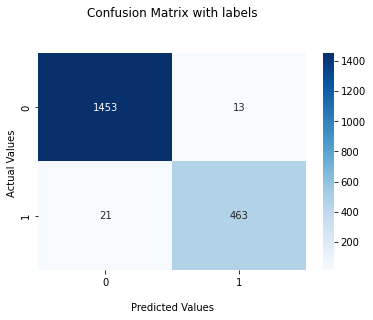

In [ ]:
# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1466
           1       0.97      0.96      0.96       484

    accuracy                           0.98      1950
   macro avg       0.98      0.97      0.98      1950
weighted avg       0.98      0.98      0.98      1950



**ROC Curve**

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nn)

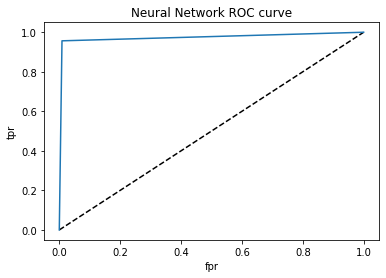

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='NN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Neural Network ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_nn)

0.9738719515632575

**Cross Validation Score**

In [ ]:
scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')

# Print the mean and standard deviation of the scores
print("Mean cross-validation score: ", scores.mean())
print("Standard deviation of the scores: ", scores.std())

Mean cross-validation score:  0.983065801085603
Standard deviation of the scores:  0.003157619939969541


Grid Search CV

In [ ]:
param_grid = {'hidden_layer_sizes': [(50,50,50), (100,)],
              'activation': ['tanh', 'relu'],
              'solver': ['adam', 'sgd'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant', 'adaptive']}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score found
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best accuracy:  0.9841656693141841


# KNN

**KNN Model**

In [ ]:
start_time = time.time()
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,13)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(x_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)

print("Time taken to train the KNN model: ", time.time() - start_time, "seconds")

Time taken to train the KNN model:  3.1560885906219482 seconds


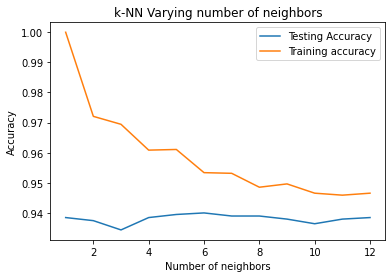

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=9)

In [ ]:
#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn_accuracy = knn.score(x_test,y_test)
print(knn_accuracy)

0.9379487179487179


In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred_knn = knn.predict(x_test)

**Confustion Matrix**

In [ ]:
cm = confusion_matrix(y_test,y_pred_knn)

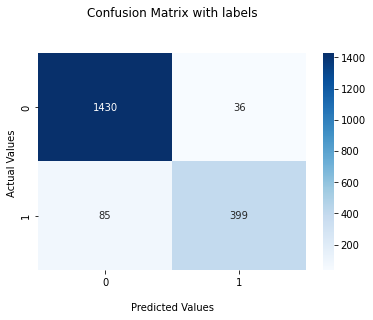

In [ ]:
# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1466
           1       0.97      0.96      0.96       484

    accuracy                           0.98      1950
   macro avg       0.98      0.97      0.98      1950
weighted avg       0.98      0.98      0.98      1950



ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [ ]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

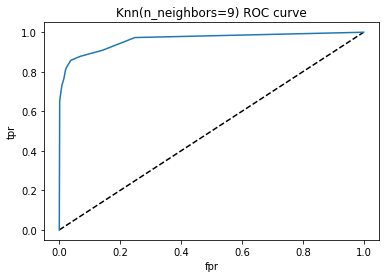

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9) ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.9629670605346532

Cross Validation

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

Hyperparameter tuning

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In [ ]:
scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')

# Print the mean and standard deviation of the scores
print("Mean cross-validation score: ", scores.mean())
print("Standard deviation of the scores: ", scores.std())

Mean cross-validation score:  0.941060457694121
Standard deviation of the scores:  0.0031497593018981517


In [ ]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.9452389414765652

In [ ]:
knn_cv.best_params_

{'n_neighbors': 2}

# ADA Boost

In [ ]:
start_time = time.time()
abc = AdaBoostClassifier(n_estimators=550, learning_rate=0.01, random_state=0)
model = abc.fit(x_train, y_train)
print("Time taken to train the ADAboost model: ", time.time() - start_time, "seconds")

Time taken to train the ADAboost model:  3.754985809326172 seconds


In [ ]:
y_pred_adaboost = model.predict(x_test)
print(y_pred_adaboost)

[0 0 0 ... 0 0 0]


**ADA Boost Accuracy**

In [ ]:
adaboost_accuracy = model.score(x_test,y_test)
adaboost_accuracy

0.9825641025641025

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test,y_pred_adaboost)

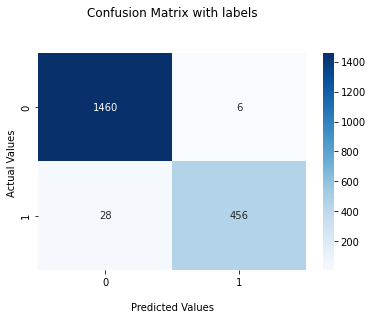

In [ ]:
# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1466
           1       0.99      0.94      0.96       484

    accuracy                           0.98      1950
   macro avg       0.98      0.97      0.98      1950
weighted avg       0.98      0.98      0.98      1950



**ROC (Reciever Operating Charecteristic) curve**

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_adaboost)

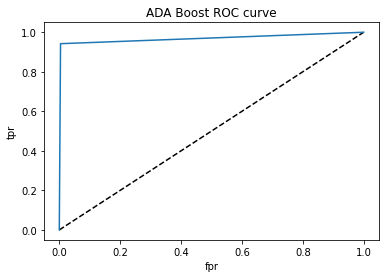

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ADA')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ADA Boost ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.9629670605346532

**Cross Validation**

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation: ", cv_scores.std())

Cross-validation scores:  [0.98901099 0.99120879 0.98129813 0.9779978  0.98569857]
Mean accuracy:  0.985042855933945
Standard deviation:  0.004854906561679014


In [ ]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0, 1.5],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the best cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 1.0, 'n_estimators': 150}
Best cross-validation score:  0.9936220215428136


# SVM

In [ ]:
start_time = time.time()
# Train the SVM model
model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

print("Time taken to train the NNT model: ", time.time() - start_time, "seconds")
# Make predictions on the test data
y_pred_svm = model.predict(x_test)

Time taken to train the NNT model:  1.2463538646697998 seconds


**SVM Accuracy**

In [ ]:
svm_accuracy = model.score(x_test,y_test)
print('svm accuracy')
print(svm_accuracy)

svm accuracy
0.9871794871794872


Confusion matrix:


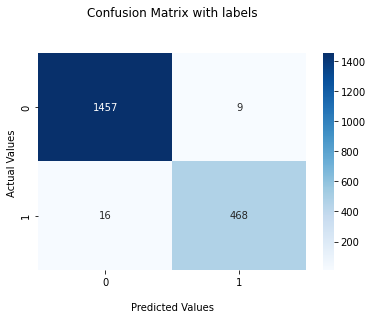

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix:')

# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1466
           1       0.98      0.97      0.97       484

    accuracy                           0.99      1950
   macro avg       0.99      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950



**ROC (Reciever Operating Charecteristic) curve**

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)

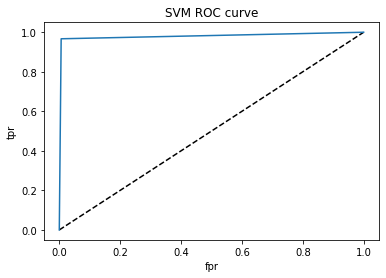

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_svm)

0.9804014972996742

**Cross Validation**

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation: ", cv_scores.std())

Cross-validation scores:  [0.98571429 0.98791209 0.98789879 0.98019802 0.98239824]
Mean accuracy:  0.9848242846262648
Standard deviation:  0.0030681340656736424


In [ ]:
# Define the hyperparameter grid to search over
# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the best cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Best cross-validation score:  0.987904109092228


# Summary

**Accuray of all classifier algorithms**

In [ ]:
print('Pruned Decision Tree: ', dt_accuracy)
print('Neural Network: ', nn_accuracy)
print('SVM: ', svm_accuracy)
print('KNN: ', knn_accuracy)
print('ADABoost: ', adaboost_accuracy)

Pruned Decision Tree:  0.9841025641025641
Neural Network:  0.9825641025641025
SVM:  0.9871794871794872
KNN:  0.9379487179487179
ADABoost:  0.9825641025641025


In [ ]:
fnl = pd.DataFrame({
    'Pruned Decision Tree' : dt_accuracy,
    'Neural Network' : nn_accuracy,
    'SVM' : svm_accuracy,
    'KNN' : knn_accuracy,
    'ADABoost': adaboost_accuracy,
}, columns=['Pruned Decision Tree', 'Neural Network', 'SVM', 'KNN', 'ADABoost',],index=[0])

fnl = fnl.T
fnl

0
Pruned Decision Tree  0.984103
Neural Network        0.982564
SVM                   0.987179
KNN                   0.937949
ADABoost              0.982564

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Pruned Decision Tree'),
 Text(0, 0, 'Neural Network'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'ADABoost')]

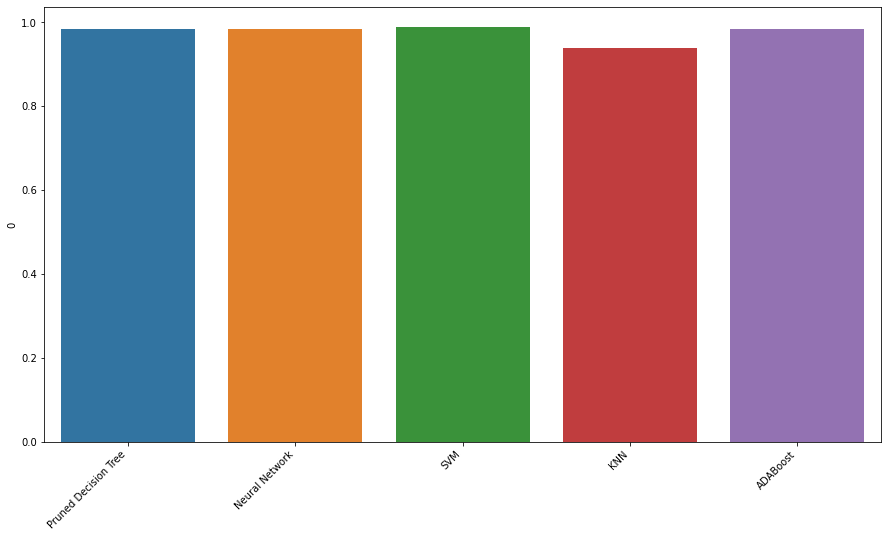

In [ ]:
fig = plt.figure(figsize=(15,8))

ax = sns.barplot(fnl.index,fnl[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")